## 태양광 LSTM/ 충전시간발전량 예측하기

In [1]:
# Dataset : 믿음태양광발전소 데이터 + 기상청데이터

In [2]:
# 충전시간발전량 : y
# 다른 특성은 : X
# 여러가지 feature 바탕으로 충전시간발전량 예측
# LSTM 활용 on keras


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sun_weather=pd.read_csv('sun_weather.csv')

In [5]:
sun_weather.head()

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
0,160701,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
1,160702,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2,160703,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
3,160704,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
4,160705,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [6]:
sun_weather.shape

(382, 84)

In [7]:
#날짜 컬럼 date데이터로 변환
sun_weather['날짜'] = pd.to_datetime(sun_weather['날짜'], format='%y%m%d')

In [8]:
sun_weather.index = sun_weather['날짜']

In [9]:
del sun_weather['날짜']

In [53]:
sun_weather.columns

Index(['5Hr', '6Hr', '7Hr', '8Hr', '9Hr', '10Hr', '11Hr', '12Hr', '13Hr',
       '14Hr', '15Hr', '16Hr', '17Hr', '18Hr', '19Hr', '20Hr', '충전시간발전량',
       '일출시간', '일몰시간', '강수량5hr', '강수량6hr', '강수량7hr', '강수량8hr', '강수량9hr',
       '강수량10hr', '강수량11hr', '강수량12hr', '강수량13hr', '강수량14hr', '강수량15hr',
       '강수량16hr', '강수량17hr', '강수량18hr', '강수량19hr', '강수량20hr', '습도5hr', '습도6hr',
       '습도7hr', '습도8hr', '습도9hr', '습도10hr', '습도11hr', '습도12hr', '습도13hr',
       '습도14hr', '습도15hr', '습도16hr', '습도17hr', '습도18hr', '습도19hr', '습도20hr',
       '풍속5hr', '풍속6hr', '풍속7hr', '풍속8hr', '풍속9hr', '풍속10hr', '풍속11hr',
       '풍속12hr', '풍속13hr', '풍속14hr', '풍속15hr', '풍속16hr', '풍속17hr', '풍속18hr',
       '풍속19hr', '풍속20hr', '기온5hr', '기온6hr', '기온7hr', '기온8hr', '기온9hr',
       '기온10hr', '기온11hr', '기온12hr', '기온13hr', '기온14hr', '기온15hr', '기온16hr',
       '기온17hr', '기온18hr', '기온19hr', '기온20hr'],
      dtype='object')

In [55]:
del sun_weather['일출시간']

In [56]:
del sun_weather['일몰시간']

In [57]:
sun_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 382 entries, 2016-07-01 to 2017-07-17
Data columns (total 81 columns):
5Hr        382 non-null float64
6Hr        382 non-null float64
7Hr        382 non-null float64
8Hr        382 non-null float64
9Hr        382 non-null float64
10Hr       382 non-null float64
11Hr       382 non-null float64
12Hr       382 non-null float64
13Hr       382 non-null float64
14Hr       382 non-null float64
15Hr       382 non-null float64
16Hr       382 non-null float64
17Hr       382 non-null float64
18Hr       382 non-null float64
19Hr       382 non-null float64
20Hr       382 non-null int64
충전시간발전량    382 non-null float64
강수량5hr     382 non-null float64
강수량6hr     382 non-null float64
강수량7hr     382 non-null float64
강수량8hr     382 non-null float64
강수량9hr     382 non-null float64
강수량10hr    382 non-null float64
강수량11hr    382 non-null float64
강수량12hr    382 non-null float64
강수량13hr    382 non-null float64
강수량14hr    382 non-null float64
강수량15hr    382

In [58]:
sun_weather.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [59]:
# from pandas.tseries.offsets import MonthEnd
# sun_weather['날짜'] = pd.to_datetime(sun_weather['날짜'])

In [60]:
# from datetime import datetime, timedelta
# s = sun_weather.날짜
# s

In [61]:
# sun_weather.plot()

In [62]:
# sun_weather.dtypes

In [63]:
sun_weather.shape

(382, 81)

In [64]:
sun_weather.loc['2017-03-25']

5Hr          0.0
6Hr          0.0
7Hr          0.0
8Hr          1.2
9Hr         13.9
10Hr        21.7
11Hr        24.5
12Hr        26.1
13Hr        14.6
14Hr        36.9
15Hr        19.3
16Hr        66.6
17Hr        54.5
18Hr         4.3
19Hr         0.0
20Hr         0.0
충전시간발전량    209.7
강수량5hr       0.6
강수량6hr       0.5
강수량7hr       0.4
강수량8hr       0.0
강수량9hr       0.0
강수량10hr      0.0
강수량11hr      0.0
강수량12hr      0.0
강수량13hr      0.0
강수량14hr      0.0
강수량15hr      0.0
강수량16hr      0.0
강수량17hr      0.0
           ...  
풍속7hr        2.4
풍속8hr        2.0
풍속9hr        2.8
풍속10hr       2.9
풍속11hr       0.3
풍속12hr       0.5
풍속13hr       0.4
풍속14hr       0.2
풍속15hr       0.7
풍속16hr       1.1
풍속17hr       0.4
풍속18hr       0.7
풍속19hr       0.5
풍속20hr       0.3
기온5hr        7.8
기온6hr        7.8
기온7hr        7.6
기온8hr        8.7
기온9hr        8.0
기온10hr       7.5
기온11hr       6.5
기온12hr       5.5
기온13hr       6.0
기온14hr       5.3
기온15hr       4.7
기온16hr       5.2
기온17hr       4.7
기온18hr       4

In [65]:
# 382 * 0.7

In [66]:
train = sun_weather.loc[:'2017-03-25']
test = sun_weather.loc['2017-03-25':]

In [67]:
train.shape

(268, 81)

In [68]:
test.shape

(115, 81)

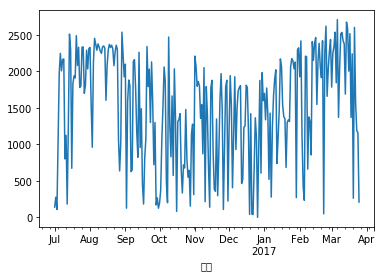

In [69]:
ax = train.충전시간발전량.plot()

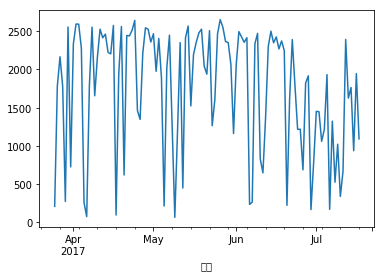

In [70]:
test.충전시간발전량.plot()

In [71]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [72]:
train.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,...,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,...,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,...,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,...,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,...,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [73]:
test.head()

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.0,0.0,1.2,13.9,21.7,24.5,26.1,14.6,36.9,...,6.5,5.5,6.0,5.3,4.7,5.2,4.7,4.4,4.2,3.5
2017-03-26,0.0,0.2,43.6,122.7,206.9,349.4,375.5,340.8,301.4,250.6,...,7.6,6.7,6.3,6.6,6.3,6.0,5.6,5.3,6.1,6.4
2017-03-27,0.0,0.0,29.4,99.4,108.0,242.1,293.6,419.4,351.7,373.9,...,8.8,6.8,6.7,5.5,6.3,5.5,5.7,4.7,3.4,2.7
2017-03-28,0.0,0.2,47.6,163.2,279.8,366.3,376.1,319.0,293.3,245.1,...,9.6,9.3,8.7,8.9,8.1,7.5,7.4,7.4,7.4,7.3
2017-03-29,0.0,0.0,0.0,2.2,5.7,22.8,34.7,38.7,55.1,56.4,...,10.5,10.1,8.9,8.4,9.4,8.8,8.3,7.9,7.1,6.5


In [74]:
train_sc = sc.fit_transform(train)
# train_sc

In [75]:
test_sc = sc.transform(test)
# test_sc

In [76]:
test_sc.max()

1.8563829787234043

In [77]:
test_sc.min()

-0.18965517241379315

In [78]:
train_sc.max()

1.0000000000000002

In [79]:
train_sc.min()

0.0

In [80]:
train_sc_df = pd.DataFrame(train_sc, columns= train.columns, index=train.index)
train_sc_df.head(2)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,0.132979,0.414141,0.211027,0.089433,0.156135,0.076749,0.019991,0.060490,0.003129,...,0.842444,0.837209,0.869565,0.886598,0.910653,0.920690,0.909091,0.871287,0.870130,0.850794
2016-07-02,0.0,0.388298,0.273850,0.143061,0.096172,0.150079,0.002490,0.003911,0.012567,0.065704,...,0.720257,0.750831,0.759197,0.756014,0.762887,0.786207,0.764310,0.801980,0.795455,0.780952


In [81]:
test_sc_df = pd.DataFrame(test_sc, columns= test.columns, index=test.index)
test_sc_df.head(2)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.000000,0.000000,0.005703,0.042573,0.057135,0.055468,0.056714,0.031097,0.088809,...,0.276527,0.235880,0.257525,0.237113,0.223368,0.255172,0.252525,0.264026,0.279221,0.257143
2017-03-26,0.0,0.010638,0.489338,0.583175,0.633691,0.919958,0.850125,0.740548,0.641960,0.603129,...,0.311897,0.275748,0.267559,0.281787,0.278351,0.282759,0.282828,0.293729,0.340909,0.349206


In [82]:
# test_sc_df.isnull().sum()

In [83]:
# test_sc_df.충전시간발전량

In [84]:
X_train = train_sc_df.dropna().drop('충전시간발전량', axis=1)
y_train = train_sc_df.dropna()[['충전시간발전량']]

In [85]:
X_train.head(1)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0.0,0.132979,0.414141,0.211027,0.089433,0.156135,0.076749,0.019991,0.06049,0.003129,...,0.842444,0.837209,0.869565,0.886598,0.910653,0.92069,0.909091,0.871287,0.87013,0.850794


In [86]:
y_train.head(1)

,충전시간발전량
날짜,
2016-07-01,0.051589


In [87]:
X_test = test_sc_df.dropna().drop('충전시간발전량', axis=1)
# y_test = test_sc_df.dropna().충전시간발전량
y_test = test_sc_df.dropna()[['충전시간발전량']]

In [88]:
X_test.head(1)

,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,...,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
날짜,,,,,,,,,,,,,,,,,,,,,
2017-03-25,0.0,0.0,0.0,0.005703,0.042573,0.057135,0.055468,0.056714,0.031097,0.088809,...,0.276527,0.23588,0.257525,0.237113,0.223368,0.255172,0.252525,0.264026,0.279221,0.257143


In [89]:
y_test.head(1)

,충전시간발전량
날짜,
2017-03-25,0.077162


In [90]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [91]:
# keras에서는 RNN계열의 모델을 트레이닝할 때 요구되는 데이터의 형식이 있다.
# 바로 3차원 데이터여야하며, 각각의 차원은(size, timestep, feature)

In [92]:
X_train.shape

(268, 80)

In [93]:
X_train_t = X_train.reshape(X_train.shape[0], 80, 1)
X_test_t = X_test.reshape(X_test.shape[0], 80, 1)

In [94]:
X_train_t.shape

(268, 80, 1)

In [95]:
X_test_t.shape

(115, 80, 1)

In [96]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [97]:
K.clear_session()
model = Sequential()
model.add(LSTM(20, input_shape=(80,1))) # shape는 차원맞추는 것
model.add(Dense(1))  #Dense : output 개수 (이거 아닌듯!) -> layer의 갯수인

In [98]:
X_train_t.shape

(268, 80, 1)

In [99]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train, epochs = 100, batch_size=30, verbose=1)

Epoch 1/100
268/268 [==============================] - 1s 3ms/step - loss: 0.3952
Epoch 2/100
268/268 [==============================] - 0s 942us/step - loss: 0.2415
Epoch 3/100
268/268 [==============================] - 0s 915us/step - loss: 0.1478
Epoch 4/100
268/268 [==============================] - 0s 923us/step - loss: 0.1026
Epoch 5/100
268/268 [==============================] - 0s 915us/step - loss: 0.1020
Epoch 6/100
268/268 [==============================] - 0s 930us/step - loss: 0.0980
Epoch 7/100
268/268 [==============================] - 0s 908us/step - loss: 0.0912
Epoch 8/100
268/268 [==============================] - 0s 908us/step - loss: 0.0886
Epoch 9/100
268/268 [==============================] - 0s 960us/step - loss: 0.0853
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0828
Epoch 11/100
268/268 [==============================] - 0s 956us/step - loss: 0.0811
Epoch 12/100
268/268 [==============================] - 0s 927us/step - loss: 

268/268 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 99/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 100/100
268/268 [==============================] - 0s 1ms/step - loss: 0.0078


In [100]:
y_pred = model.predict(X_test_t)

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [102]:
from math import sqrt

In [103]:
rmse = sqrt(mean_squared_error(y_test, y_pred))

In [104]:
rmse

0.12626235160186788

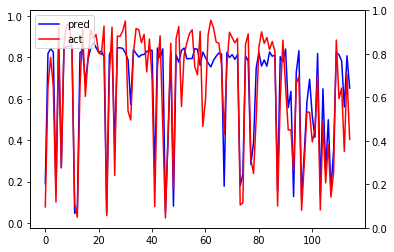

In [105]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(pred, 'b', label='pred')

loss_ax.plot(y_test, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()

In [106]:
model50 = Sequential()
model50.add(Dense(80, input_dim = 80, activation = 'tanh'))
model50.add(Dropout(0.2))
model50.add(Dense(300, activation = 'tanh'))
model50.add(Dropout(0.2))
model50.add(Dense(500, activation = 'tanh'))
model50.add(Dropout(0.2))
model50.add(Dense(300, activation = 'tanh'))
model50.add(Dropout(0.2))
model50.add(Dense(1))
# model50.compile(loss='mean_squared_error', optimizer='rmsprop')
model50.compile(loss='mean_squared_error', optimizer='adam')

hist = model50.fit(X_train, y_train, epochs=50, batch_size=10)
model50.evaluate(X_test, y_test)
yhat = model50.predict(X_test)
rmse2 = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse2)


Epoch 1/50
268/268 [==============================] - 1s 2ms/step - loss: 0.5106
Epoch 2/50
268/268 [==============================] - 0s 711us/step - loss: 0.1089
Epoch 3/50
268/268 [==============================] - 0s 618us/step - loss: 0.0530
Epoch 4/50
268/268 [==============================] - 0s 562us/step - loss: 0.0333
Epoch 5/50
268/268 [==============================] - 0s 610us/step - loss: 0.0345
Epoch 6/50
268/268 [==============================] - 0s 566us/step - loss: 0.0329
Epoch 7/50
268/268 [==============================] - 0s 569us/step - loss: 0.0294
Epoch 8/50
268/268 [==============================] - 0s 558us/step - loss: 0.0322
Epoch 9/50
268/268 [==============================] - 0s 562us/step - loss: 0.0292
Epoch 10/50
268/268 [==============================] - 0s 551us/step - loss: 0.0249
Epoch 11/50
268/268 [==============================] - 0s 573us/step - loss: 0.0205
Epoch 12/50
268/268 [==============================] - 0s 618us/step - loss: 0.0195
Epo

In [108]:
from math import sqrt

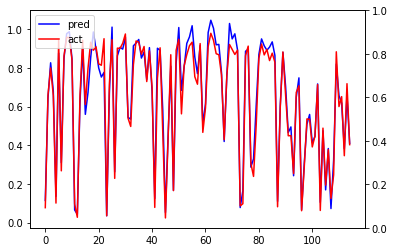

In [109]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

pred = y_pred

loss_ax.plot(yhat, 'b', label='pred')

loss_ax.plot(y_test, 'r', label='act')

loss_ax.legend(loc='upper left')

plt.show()